# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [114]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    make_scorer,
)

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [115]:
dataTemp = pd.read_csv("https://raw.githubusercontent.com/lhughey/AIML_Course/main/CaseStudy2%20-%20Personal%20Loan%20Campaign/Loan_Modelling.csv")

## Loading the dataset

In [116]:
data = dataTemp.copy()

## Data Overview

* Observations
* Sanity checks

In [117]:
print("info")
print(data.info)
print("---------------------------")
print("shape")
print(data.shape)
print("---------------------------")
print("head")
print(data.head())
print("---------------------------")
print("tail")
print(data.tail())


info
<bound method DataFrame.info of         ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
0        1   25           1      49    91107       4    1.6          1   
1        2   45          19      34    90089       3    1.5          1   
2        3   39          15      11    94720       1    1.0          1   
3        4   35           9     100    94112       1    2.7          2   
4        5   35           8      45    91330       4    1.0          2   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
0

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
  - More than 50% of customers have no mortgage This can be explained that they either pay rent, live with family, or have paid off their mortgage.
  - Also, there are a lot of outliers in this distribution.
2. How many customers have credit cards?
  - 1470 out of 5000 customers have credit cards.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  - Income and credit card average have the highest correlations to the target attribute. The person's income has a correlation of .49, whereas the credit card average has a correlation of .36.
4. How does a customer's interest in purchasing a loan vary with their age?
  - The take rate is general is correlated with a users age group. Older age groups have higher take rates than younger groups, with the 40-50 age group having the highest take rate.
5. How does a customer's interest in purchasing a loan vary with their education?
  - The interest in purchasing a loan is directly porportional to their eduction, on average. Those with more education are more likely to purchase a loan.

In [118]:
numberOfCreditCards = data['CreditCard'].value_counts()
print(numberOfCreditCards)

CreditCard
0    3530
1    1470
Name: count, dtype: int64


In [119]:
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [120]:
#determine nulls and bad data
data.isnull().sum()


,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [121]:
data.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal_Loan,int64


[  0 155 104 134 111 260 163 159  97 122 193 198 285 412 153 211 207 240
 455 112 336 132 118 174 126 236 166 136 309 103 366 101 251 276 161 149
 188 116 135 244 164  81 315 140  95  89  90 105 100 282 209 249  91  98
 145 150 169 280  99  78 264 113 117 325 121 138  77 158 109 131 391  88
 129 196 617 123 167 190 248  82 402 360 392 185 419 270 148 466 175 147
 220 133 182 290 125 124 224 141 119 139 115 458 172 156 547 470 304 221
 108 179 271 378 176  76 314  87 203 180 230 137 152 485 300 272 144  94
 208 275  83 218 327 322 205 227 239  85 160 364 449  75 107  92 187 355
 106 587 214 307 263 310 127 252 170 265 177 305 372  79 301 232 289 212
 250  84 130 303 256 259 204 524 157 231 287 247 333 229 357 361 294  86
 329 142 184 442 233 215 394 475 197 228 297 128 241 437 178 428 162 234
 257 219 337 382 397 181 120 380 200 433 222 483 154 171 146 110 201 277
 268 237 102  93 354 195 194 238 226 318 342 266 114 245 341 421 359 565
 319 151 267 601 567 352 284 199  80 334 389 186 24

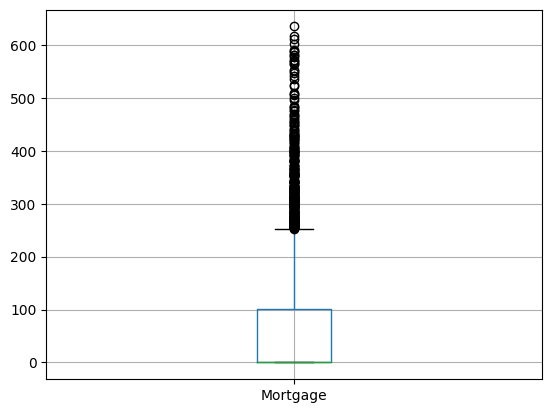

In [122]:
#determine the distinct mortgage values to look for bad data
distinctVals = data['Mortgage'].unique()
print(distinctVals)

#determine the distribution of the mortgage
# data['Mortgage'].hist()
# plt.show()

data.boxplot(column=['Mortgage'])
plt.show()

In [123]:
#remove outliers using IQR
Q1 = data['Mortgage'].quantile(0.25)
Q3 = data['Mortgage'].quantile(0.75)
#find the mean
median = data['Mortgage'].median()

IQR = Q3 - Q1

print(IQR, Q1, Q3, median)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

#evaluate how much sits outside the IQR
print(data.shape)

#display outliers
outliers = data[(data['Mortgage'] <= lower_bound) |(data['Mortgage'] >= upper_bound)]
print("the number of the outliers is {}" .format(outliers['Mortgage'].value_counts))

#remove outliers
dataCleaned = data[(data['Mortgage'] > lower_bound) & (data['Mortgage'] < upper_bound)]
print("the number of the records with outliers removed is {}" .format(dataCleaned['Mortgage'].value_counts))


101.0 0.0 101.0 0.0
-151.5 252.5
(5000, 14)
the number of the outliers is <bound method IndexOpsMixin.value_counts of 22      260
39      285
42      412
59      455
66      336
       ... 
4859    541
4865    342
4899    299
4942    308
4963    306
Name: Mortgage, Length: 291, dtype: int64>
the number of the records with outliers removed is <bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3        0
4        0
        ..
4995     0
4996    85
4997     0
4998     0
4999     0
Name: Mortgage, Length: 4709, dtype: int64>


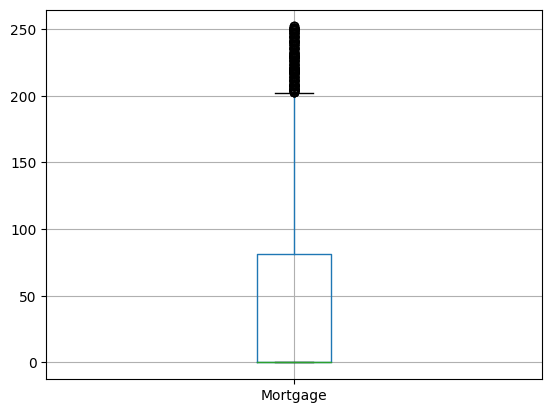

<Figure size 1000x500 with 0 Axes>

In [124]:
#view the updated data with no outliers
dataCleaned.boxplot(column=['Mortgage'])
plt.figure(figsize=(10, 5))
plt.show()


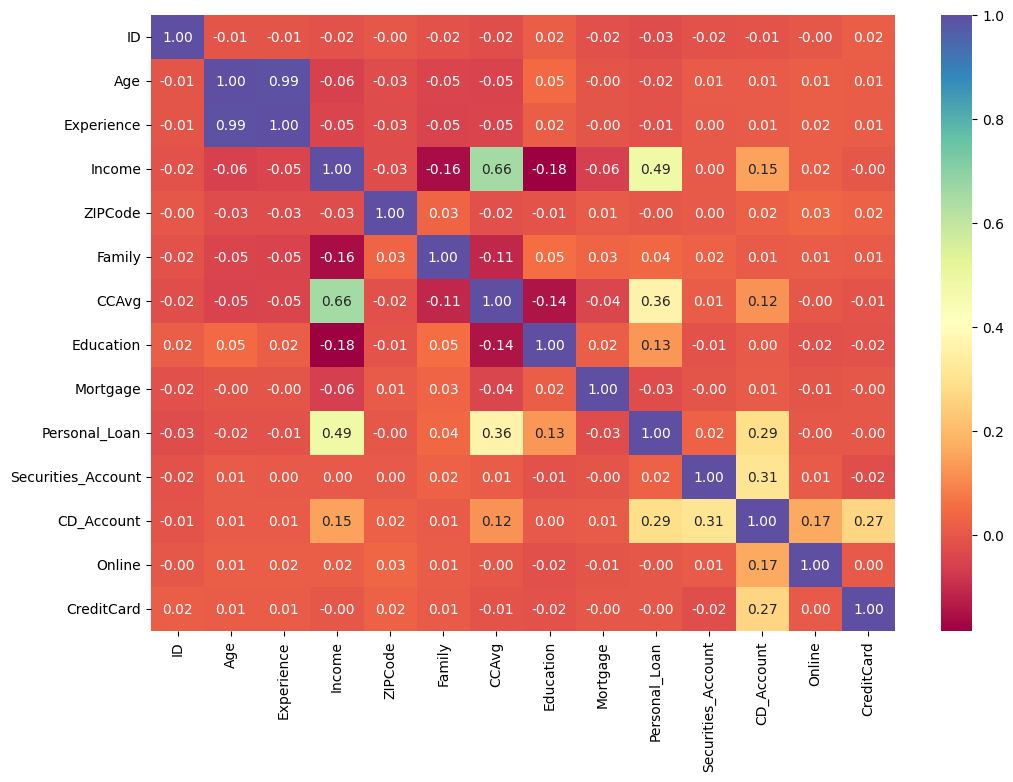

In [125]:
#determine corelation between columnsd and personal loan
dataCleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(dataCleaned.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.show()

<ipython-input-126-bd3cbc6eb4ef>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataCleaned.groupby('AgeGroup')['CreditCard'].value_counts()
<ipython-input-126-bd3cbc6eb4ef>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataCleaned.groupby(['AgeGroup', 'CreditCard']).size().unstack().plot(kind='bar', stacked=True)


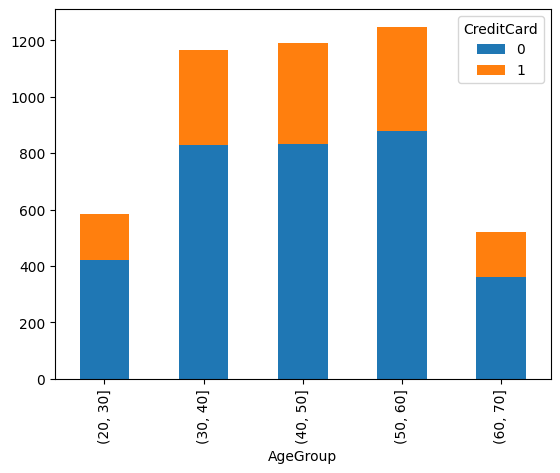

In [126]:
#determine interest in obtaining a credit card dependant on age
dataCleaned.groupby('Age')['CreditCard'].value_counts()

# #group the Age column values by 10, and add a column
dataCleaned['AgeGroup'] = pd.cut(dataCleaned['Age'], bins=range(20, 80, 10))

dataCleaned.head()
dataCleaned.groupby('AgeGroup')['CreditCard'].value_counts()

#create a stacked bar plot of Education and Personal_Loan
dataCleaned.groupby(['AgeGroup', 'CreditCard']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

#drop the grouping to not cause problems later
dataCleaned.drop(['AgeGroup'], axis=1, inplace=True)

In [127]:
distinctVals = data['Education'].unique()
print(distinctVals)

data['Education'].value_counts()

[1 2 3]


,count
Education,
1,2096
3,1501
2,1403


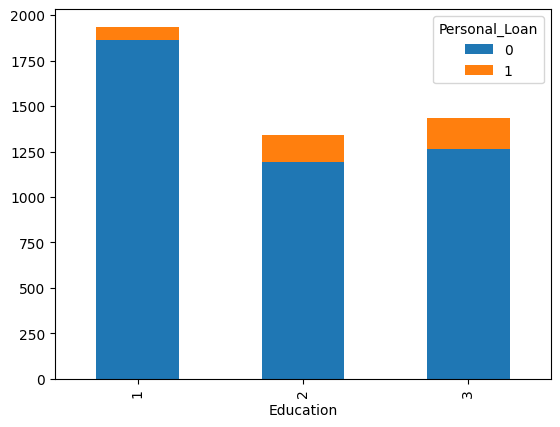

In [128]:
#create a column called Education_Level, set : Undergrad; 2: Graduate;3: Advanced
#dataCleaned['Education_Level'] = dataCleaned['Education'].map({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced'})

dataCleaned.head()

#create a stacked bar plot of Education and Personal_Loan
dataCleaned.groupby(['Education', 'Personal_Loan']).size().unstack().plot(kind='bar', stacked=True)
plt.show()


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [129]:
#determine null values
dataCleaned.isnull().sum()
#determine if any numeric valued columns contained values less than 0
dataCleaned.describe()

#the experience column has values less than zero. Experience should never be less than zero, so use the abolute value
print(dataCleaned['Experience'].dtype) #all records are numeric

dataCleaned.loc[:, 'Experience'] = dataCleaned['Experience'].abs()

dataTest = dataCleaned[dataCleaned['Experience'] < 0]
print(dataTest)

dataCleaned.describe()

#outlier treatment has been done above



int64
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIPCode, Family, CCAvg, Education, Mortgage, Personal_Loan, Securities_Account, CD_Account, Online, CreditCard]
Index: []


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000
mean,2502.037163,45.379061,20.169250,70.359524,93169.073052,2.411977,1.868152,1.893183,38.011467,0.082183,0.104693,0.054152,0.596942,0.294542
std,1447.450608,11.474811,11.433084,44.261672,1757.509712,1.150779,1.688058,0.839153,68.100514,0.274673,0.306190,0.226341,0.490564,0.455885
min,1.000000,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1245.000000,35.000000,10.000000,38.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2502.000000,45.000000,20.000000,61.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3756.000000,55.000000,30.000000,91.000000,94608.000000,3.000000,2.500000,3.000000,81.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,252.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
#determine datatype of ZIPCode
print(dataCleaned['ZIPCode'].dtype)

#set ZipCode to 2 number length to reduce the number of unique values
dataCleaned.loc[:, 'ZIPCode'] = dataCleaned['ZIPCode'].astype(str).str[:2]

dataCleaned.head()
dataCleaned['ZIPCode'].value_counts()

#zip should be set as category to be used for grouping below
dataCleaned['ZIPCode'] = dataCleaned['ZIPCode'].astype('category')


int64


In [131]:
#clean up CCAvg, must be converted to an int for processing
dataCleaned['CCAvg'] = dataCleaned['CCAvg'].astype(str).str[:2]
dataCleaned['CCAvg'] = dataCleaned['CCAvg'].astype(float).astype(int)
dataCleaned.head()

dataCleaned.dtypes


,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIPCode,category
Family,int64
CCAvg,int64
Education,int64
Mortgage,int64
Personal_Loan,int64


In [132]:
X = dataCleaned.drop(["Personal_Loan"], axis=1)
y = dataCleaned["Personal_Loan"]

#set categorial columns names into an array
cat_cols = ["Education", "Securities_Account", "CD_Account", "Online", "CreditCard", "ZIPCode"]

#ignore inplace errors
pd.options.mode.chained_assignment = None

# Convert categorical columns to "category" dtype
dataCleaned[cat_cols] = dataCleaned[cat_cols].astype("category")

# creating dummy variables
X_encoded = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True) # Assign the result to a new variable

y.head()
X.head()

# splitting the data in an 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [133]:
#print details of the tranining data
print(X_train.shape)
print(y_train.shape)
print("Percentage of classes in training set")
print(y_train.value_counts(normalize=True))
print()
print(X_test.shape)
print(y_test.shape)
print("Percentage of classes in test set")
print(y_test.value_counts(normalize=True))

(3767, 13)
(3767,)
Percentage of classes in training set
Personal_Loan
0    0.917706
1    0.082294
Name: proportion, dtype: float64

(942, 13)
(942,)
Percentage of classes in test set
Personal_Loan
0    0.918259
1    0.081741
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

*


### Model Building

In [134]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):
    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

#----- Plot Confusion Matrix -----
def plot_confusion_matrix(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target values using the provided model and predictors
    y_pred = model.predict(predictors)

    # Compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    # Create labels for each cell in the confusion matrix with both count and percentage
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)    # reshaping to a matrix

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")



In [135]:
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

dataCleaned["Education"].value_counts()
X_train.info()
print("-----------------")
y_train.info()

# model.fit(X_train, y_train)
# plot_confusion_matrix(dataCleaned, X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 3767 entries, 1497 to 1651
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  3767 non-null   int64   
 1   Age                 3767 non-null   int64   
 2   Experience          3767 non-null   int64   
 3   Income              3767 non-null   int64   
 4   ZIPCode             3767 non-null   category
 5   Family              3767 non-null   int64   
 6   CCAvg               3767 non-null   int64   
 7   Education           3767 non-null   int64   
 8   Mortgage            3767 non-null   int64   
 9   Securities_Account  3767 non-null   int64   
 10  CD_Account          3767 non-null   int64   
 11  Online              3767 non-null   int64   
 12  CreditCard          3767 non-null   int64   
dtypes: category(1), int64(12)
memory usage: 386.6 KB
-----------------
<class 'pandas.core.series.Series'>
Index: 3767 entries, 1497 to 1651
Ser

In [136]:
X_train.info()
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3767 entries, 1497 to 1651
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  3767 non-null   int64   
 1   Age                 3767 non-null   int64   
 2   Experience          3767 non-null   int64   
 3   Income              3767 non-null   int64   
 4   ZIPCode             3767 non-null   category
 5   Family              3767 non-null   int64   
 6   CCAvg               3767 non-null   int64   
 7   Education           3767 non-null   int64   
 8   Mortgage            3767 non-null   int64   
 9   Securities_Account  3767 non-null   int64   
 10  CD_Account          3767 non-null   int64   
 11  Online              3767 non-null   int64   
 12  CreditCard          3767 non-null   int64   
dtypes: category(1), int64(12)
memory usage: 386.6 KB
<class 'pandas.core.series.Series'>
Index: 3767 entries, 1497 to 1651
Series name: Personal

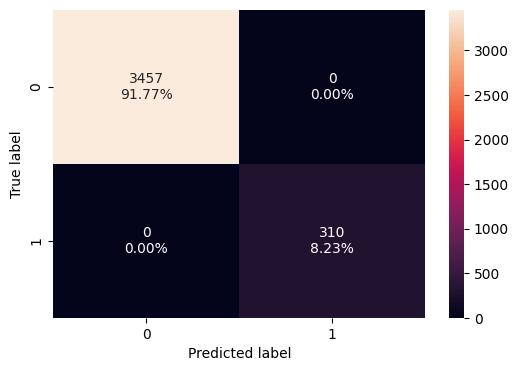

In [137]:
# # creating an instance of the decision tree model
dtree1 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
dtree1.fit(X_train, y_train)

#----- Print Train Matrix -----
plot_confusion_matrix(dtree1, X_train, y_train)


In [138]:
#determine effectiveness of model

dtree1_train_perf = model_performance_classification(
    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


,Accuracy,Recall,Precision,F1
0,0.981953,0.896104,0.884615,0.890323


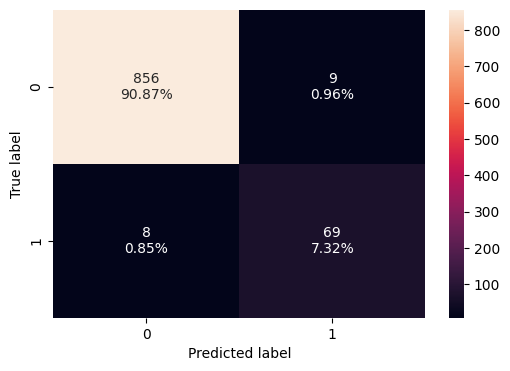

In [139]:
#test the test data against the model
#----- Print Test Matrix -----
plot_confusion_matrix(dtree1, X_test, y_test)

dtree1_test_perf = model_performance_classification(
    dtree1, X_test, y_test
)
dtree1_test_perf


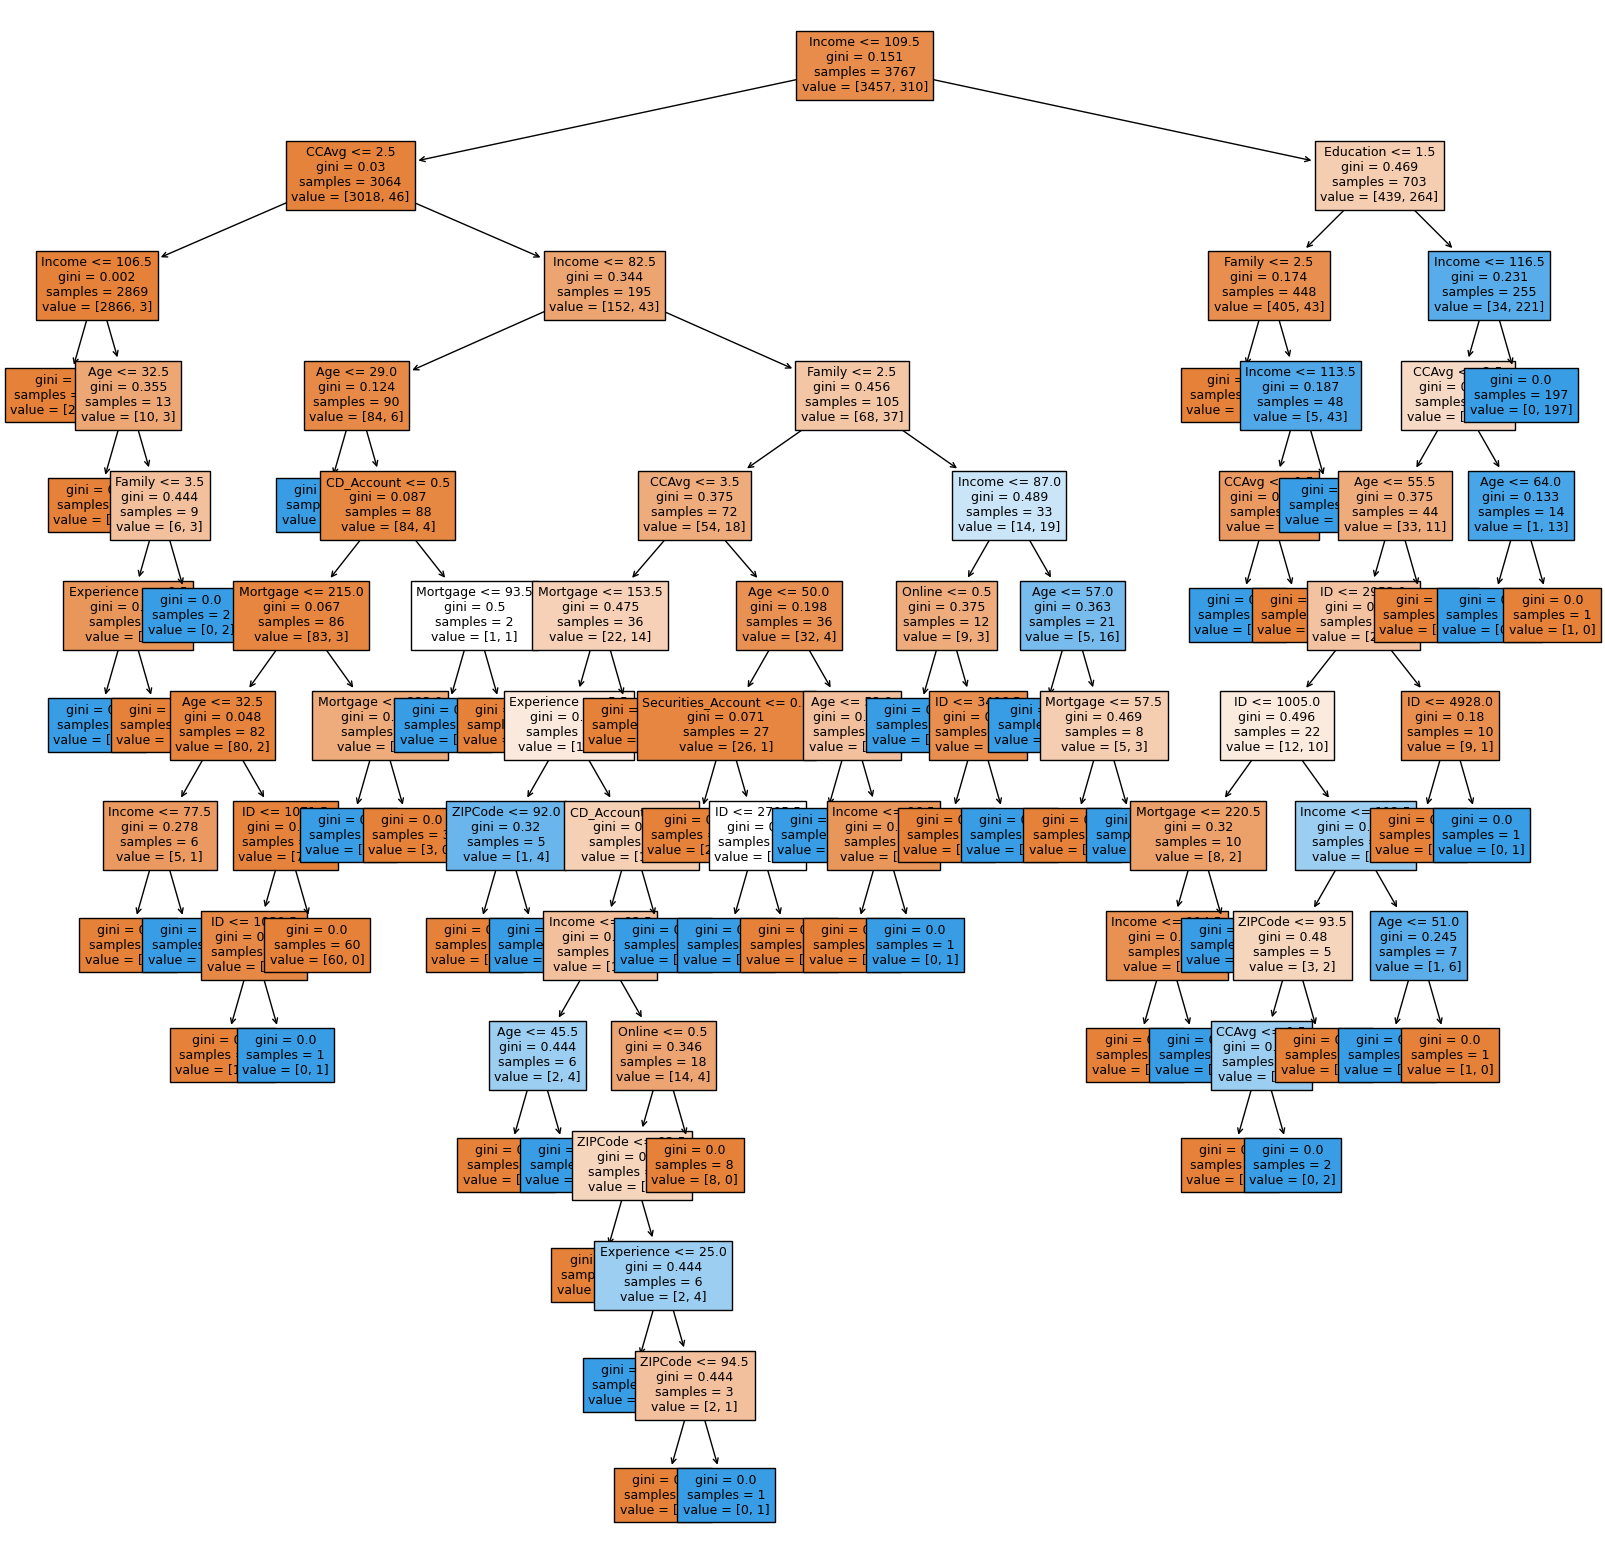

In [140]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(20, 20))

# plotting the decision tree
out = tree.plot_tree(
    dtree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)


In [141]:
#display a text representation of the tree
text_representation = tree.export_text(dtree1, feature_names=feature_names)
print(text_representation)

|--- Income <= 109.50
|   |--- CCAvg <= 2.50
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Age <= 32.50
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  32.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- Experience <= 9.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Experience >  9.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- class: 1
|   |--- CCAvg >  2.50
|   |   |--- Income <= 82.50
|   |   |   |--- Age <= 29.00
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  29.00
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- Mortgage <= 215.00
|   |   |   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |   |   |--- Income <= 77.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Income >  77.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  32.50
|   |   |

### Model Performance Improvement

**Pre Pruning**

{'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
0.8483870967741935


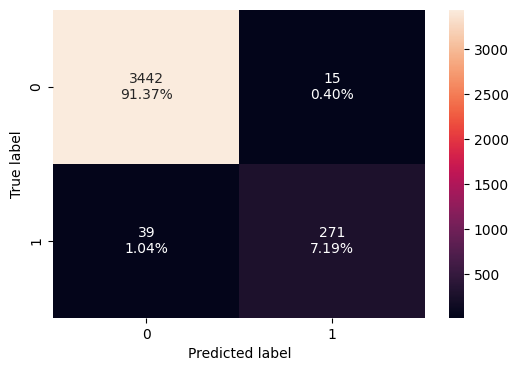

In [142]:
#pre-prune the model
estimator = DecisionTreeClassifier(random_state=42)

parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

recall_scorer = make_scorer(recall_score)

#search the grid
grid = GridSearchCV(
    estimator,
    param_grid=parameters,
    scoring=recall_scorer,
    cv=5,
    n_jobs=-1,
)

grid = grid.fit(X_train, y_train)

#set the estimator to the best estimation
estimator = grid.best_estimator_

#fit the model to the training data
estimator.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

pre_pruned_tree = estimator;

#fit the new model to the training data
pre_pruned_tree.fit(X_train, y_train)

#----- Print Train Matrix -----
plot_confusion_matrix(pre_pruned_tree, X_train, y_train)


,Accuracy,Recall,Precision,F1
0,0.985665,0.874194,0.947552,0.909396


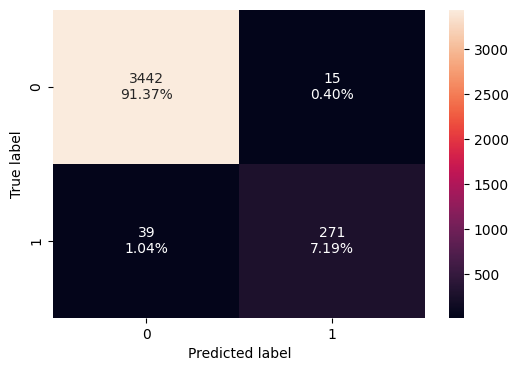

In [143]:
#evalute this pre-pruned model
plot_confusion_matrix(pre_pruned_tree, X_train, y_train)

#use training data
dtree2_train_perf = model_performance_classification(
    pre_pruned_tree, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.984076,0.896104,0.907895,0.901961


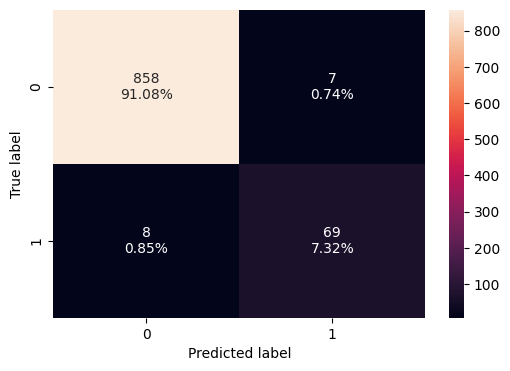

In [144]:
#use test data
plot_confusion_matrix(pre_pruned_tree, X_test, y_test)

dtree2_test_perf = model_performance_classification(
    pre_pruned_tree, X_test, y_test
)
dtree2_test_perf

                         Imp
Income              0.398331
Education           0.395055
Family              0.150602
CCAvg               0.056013
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


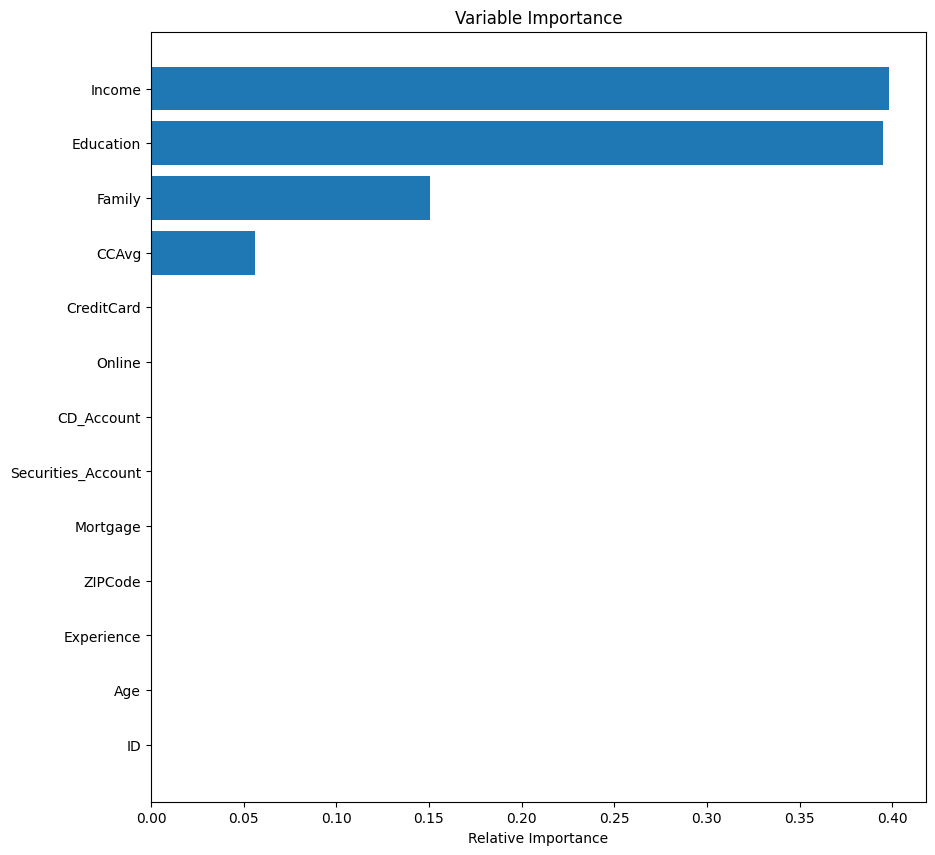

In [163]:

importances = pre_pruned_tree.feature_importances_
indexes = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importance")
plt.barh(range(len(indexes)), importances[indexes], align="center")
plt.yticks(range(len(indexes)), np.array(X_train.columns)[indexes])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

#create a chart looping over the important indexes order by desc

print(
    pd.DataFrame(
        pre_pruned_tree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

**Cost Complexity Pruning**

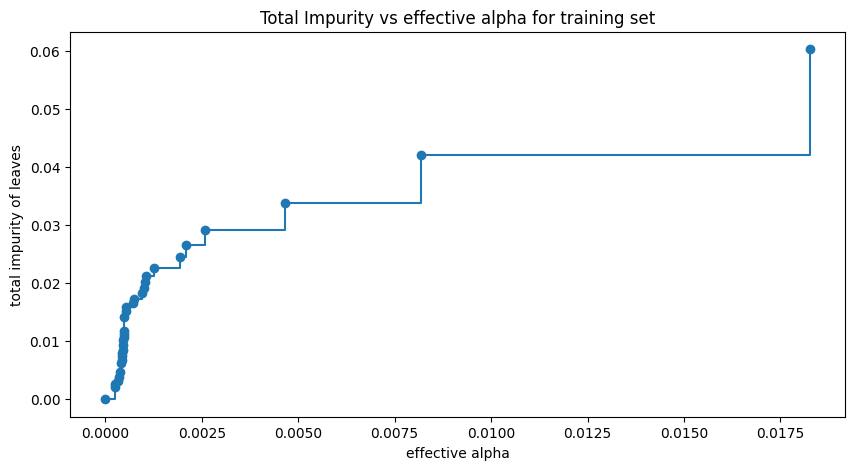

In [146]:
ccp_tree = DecisionTreeClassifier(random_state=42)

#set the pruning path
ccp_path = ccp_tree.cost_complexity_pruning_path(X_train, y_train)

#get the alphas
ccp_alphas = abs(ccp_path.ccp_alphas)
path_impurities = ccp_path.impurities

pd.DataFrame(ccp_path)

#plot the performance
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], path_impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()


In [147]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


Number of nodes in the last tree is 1 with ccp_alpha 0.04535177841099016


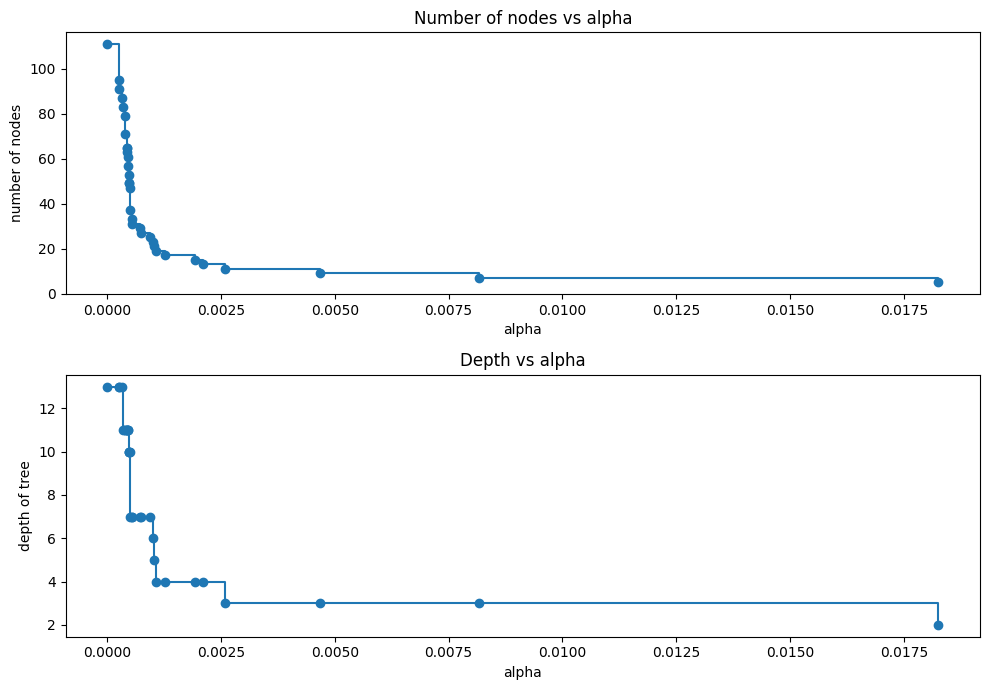

In [148]:
#display the performance data
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [149]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

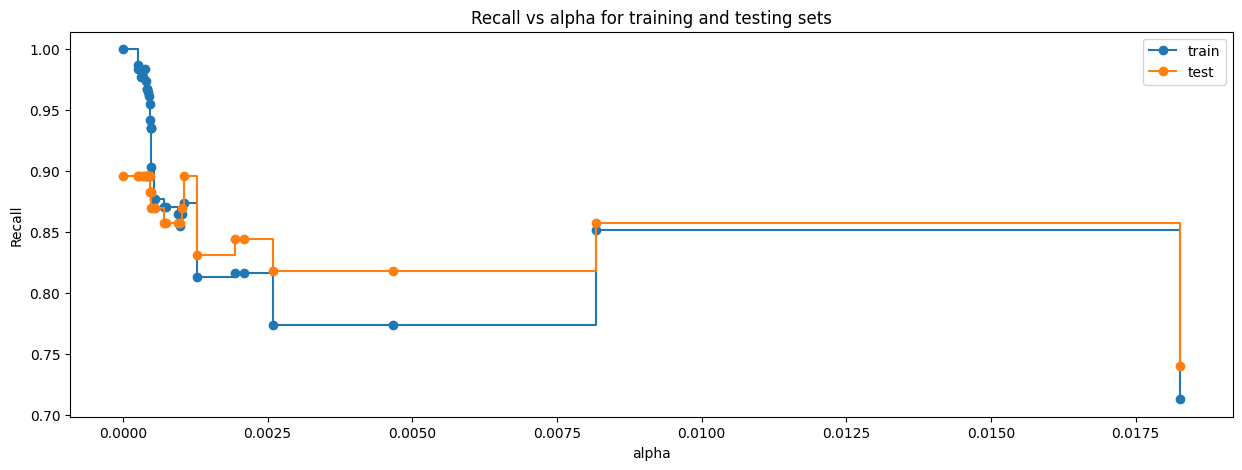

In [150]:
#plot the alpha vs recall data
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [151]:
#select the best model between
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)
print(recall_test[index_best_model])
print(index_best_model)

DecisionTreeClassifier(random_state=42)
0.8961038961038961
0


**Post Pruning**

,Accuracy,Recall,Precision,F1
0,0.981953,0.896104,0.884615,0.890323


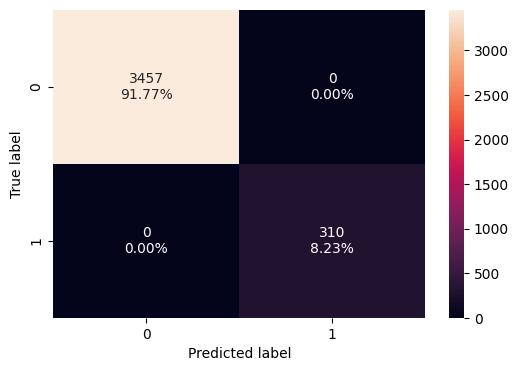

In [160]:
#post prune the model
postClassifier = DecisionTreeClassifier(
    ccp_alpha=ccp_alphas[index_best_model], random_state=42
    )

postClassifier.fit(X_train, y_train)

#----- Print Train Matrix -----
plot_confusion_matrix(postClassifier, X_train, y_train)

post_test_perf = model_performance_classification(
    postClassifier, X_test, y_test
)
post_test_perf

In [161]:
#display the importances
print(
    pd.DataFrame(
        postClassifier.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.365877
Education           0.339274
Family              0.133354
CCAvg               0.058258
Age                 0.035294
ID                  0.018767
Mortgage            0.017253
ZIPCode             0.010780
Experience          0.007900
Online              0.007245
CD_Account          0.004370
Securities_Account  0.001627
CreditCard          0.000000


In [167]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree1_train_perf.T, dtree2_train_perf.T], axis=1,
)

models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,1.0,0.985665
Recall,1.0,0.874194
Precision,1.0,0.947552
F1,1.0,0.909396


In [168]:
models_train_comp_df = pd.concat(
    [dtree1_test_perf.T, dtree2_test_perf.T], axis=1,
)

models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning)
Accuracy,0.981953,0.984076
Recall,0.896104,0.896104
Precision,0.884615,0.907895
F1,0.890323,0.901961


## Model Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

- The bank should use the pre-pruned model. It represents the highest precision, while having a similar accuracy score and F1.

- This model allows them to be most efficient in contacting customers who will purcahse a loan and minimizes FP (evident by the higher precision). Precision is very important as it reduces labor costs, and most importantly, doesn't exhaust non interested customers.

- This model illuminates the following insights
 - Income and education are the most important attributes when determining whether a customer will purchase a long, with income being the most dominate attribute.
They should focus on customer with high income and education


___